In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import plotly

## Manipulações primárias

  

In [7]:
data = pd.read_csv('/content/drive/My Drive/Bootcamp_ALURA/Portifolio-Alura/Desafios/Desafio_modulo_1/DataBase_COVID/caso.csv'  ,delimiter = ',', encoding = 'iso-8859-1')

  ### - Transformar o campo data em tipo Date


In [8]:
data['Data'] = pd.to_datetime(data['date'], format="%Y/%m/%d")
data['anomes'] = data['Data'].dt.strftime('%Y%m')

### - Adicionando um campo de região

In [9]:
d = {'RO': 'Norte','AC': 'Norte','AM': 'Norte','RR': 'Norte','PA': 'Norte'
    ,'AP': 'Norte','TO': 'Norte','MA': 'Nordeste','PI': 'Nordeste','CE': 'Nordeste'
    ,'RN': 'Nordeste','PA': 'Nordeste','PE': 'Nordeste','AL': 'Nordeste','SE': 'Nordeste'
    ,'BA': 'Nordeste','MG': 'Sudeste','ES': 'Sudeste','RJ': 'Sudeste','SP': 'Sudeste'
    ,'PA': 'Sul','SC': 'Sul','RS': 'Sul','MS': 'Centro-Oeste','MT': 'Centro-Oeste'
    ,'GO': 'Centro-Oeste','DF': 'Centro-Oeste'}

data['Regiao'] = data['state'].map(d)

### - Avaliando NaN

In [10]:
data['city'].isna().sum()

6335

In [11]:
data.dtypes

date                                      object
state                                     object
city                                      object
place_type                                object
confirmed                                  int64
deaths                                     int64
order_for_place                            int64
is_last                                     bool
estimated_population_2019                float64
estimated_population                     float64
city_ibge_code                           float64
confirmed_per_100k_inhabitants           float64
death_rate                               float64
Data                              datetime64[ns]
anomes                                    object
Regiao                                    object
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            936870 non-null  object        
 1   state                           936870 non-null  object        
 2   city                            930535 non-null  object        
 3   place_type                      936870 non-null  object        
 4   confirmed                       936870 non-null  int64         
 5   deaths                          936870 non-null  int64         
 6   order_for_place                 936870 non-null  int64         
 7   is_last                         936870 non-null  bool          
 8   estimated_population_2019       933215 non-null  float64       
 9   estimated_population            933215 non-null  float64       
 10  city_ibge_code                  933215 non-null  float64

In [13]:
data

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,Data,anomes,Regiao
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,2020-11-05,202011,Norte
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,2020-11-04,202011,Norte
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,2020-11-03,202011,Norte
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,2020-11-02,202011,Norte
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,2020-11-01,202011,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936865,2020-06-23,SP,Ãleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-23,202006,Sudeste
936866,2020-06-22,SP,Ãleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-22,202006,Sudeste
936867,2020-06-21,SP,Ãleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-21,202006,Sudeste
936868,2020-06-20,SP,Ãleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-20,202006,Sudeste


In [14]:
data['state'][data['city'].isnull()].unique()

array(['AC', 'AP', 'AM', 'AL', 'DF', 'CE', 'ES', 'BA', 'MS', 'MA', 'GO',
       'MT', 'PA', 'PB', 'PE', 'PI', 'MG', 'RO', 'RJ', 'RN', 'PR', 'RR',
       'SE', 'SC', 'RS', 'TO', 'SP'], dtype=object)

In [15]:
cidades = data[['state','city']].fillna('-').values

In [16]:
cidades

array([['AC', '-'],
       ['AC', '-'],
       ['AC', '-'],
       ...,
       ['SP', 'Ã\x93leo'],
       ['SP', 'Ã\x93leo'],
       ['SP', 'Ã\x93leo']], dtype=object)

In [17]:
teste = np.unique(cidades)

In [18]:
estado = data[['state']]

In [19]:
uniq_Estados = np.unique(estado)

In [20]:
uniq_Estados

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

### preparando para separar os valores

> Indented block



In [21]:
data

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,Data,anomes,Regiao
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,2020-11-05,202011,Norte
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,2020-11-04,202011,Norte
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,2020-11-03,202011,Norte
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,2020-11-02,202011,Norte
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,2020-11-01,202011,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936865,2020-06-23,SP,Ãleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-23,202006,Sudeste
936866,2020-06-22,SP,Ãleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-22,202006,Sudeste
936867,2020-06-21,SP,Ãleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-21,202006,Sudeste
936868,2020-06-20,SP,Ãleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-20,202006,Sudeste


In [37]:
pivot_teste =  data.pivot_table(index='Data', columns='Regiao', values='confirmed_per_100k_inhabitants')


In [38]:
pivot_teste

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Data,,,,,
2020-02-25,NaN,NaN,NaN,0.005135,NaN
2020-02-26,NaN,NaN,NaN,0.005135,NaN
2020-02-27,NaN,NaN,NaN,0.005135,NaN
2020-02-28,NaN,NaN,NaN,0.010275,NaN
2020-02-29,NaN,NaN,NaN,0.010275,NaN
...,...,...,...,...,...
2020-11-01,2713.253026,2247.072750,4418.376825,2433.493632,2288.716012
2020-11-02,2714.418453,2249.857150,4114.977099,2051.063643,2295.083438
2020-11-03,2726.924029,2255.848518,3456.576998,1527.605464,2305.163170


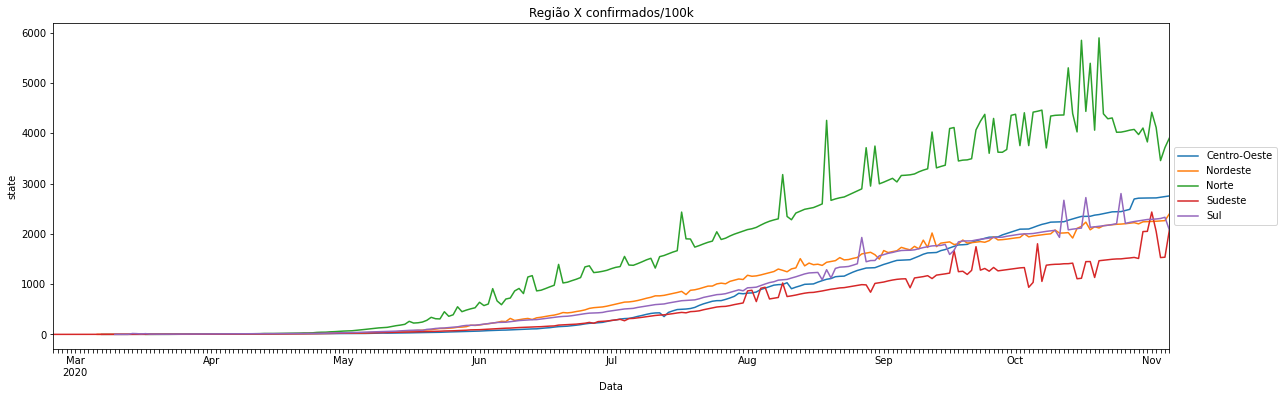

In [48]:
pivot_regiao_100k =  data.pivot_table(index='Data', columns='Regiao', values='confirmed_per_100k_inhabitants')
ax = pivot_regiao_100k.plot(xticks=pivot_regiao_100k.index,figsize =(20, 6))
ylab = ax.set_ylabel('state')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Região X confirmados/100k")
plt.show()

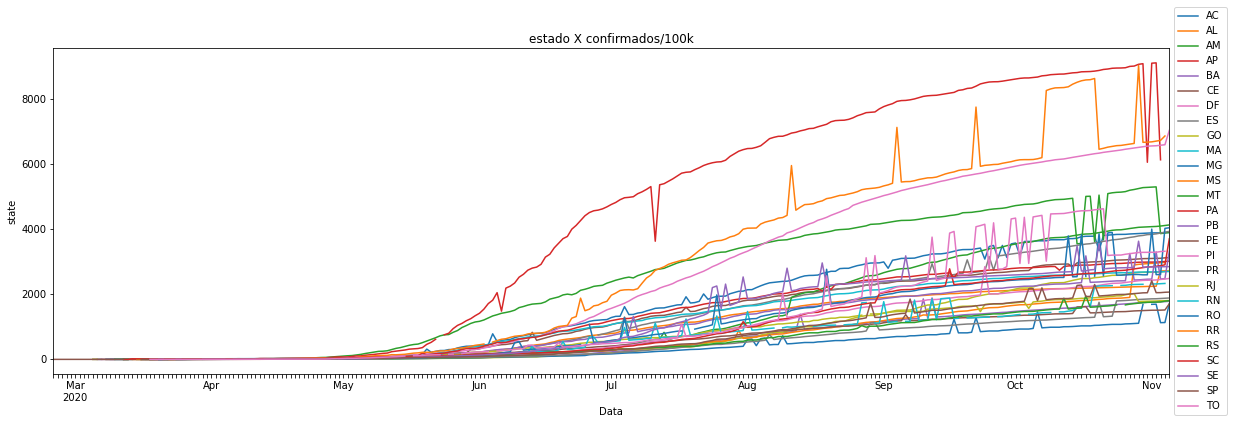

In [49]:
pivot_state_100k =  data.pivot_table(index='Data', columns='state', values='confirmed_per_100k_inhabitants')
ax = pivot_state_100k.plot(xticks=pivot_state_100k.index,figsize =(20, 6))
ylab = ax.set_ylabel('state')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("estado X confirmados/100k")
plt.show()

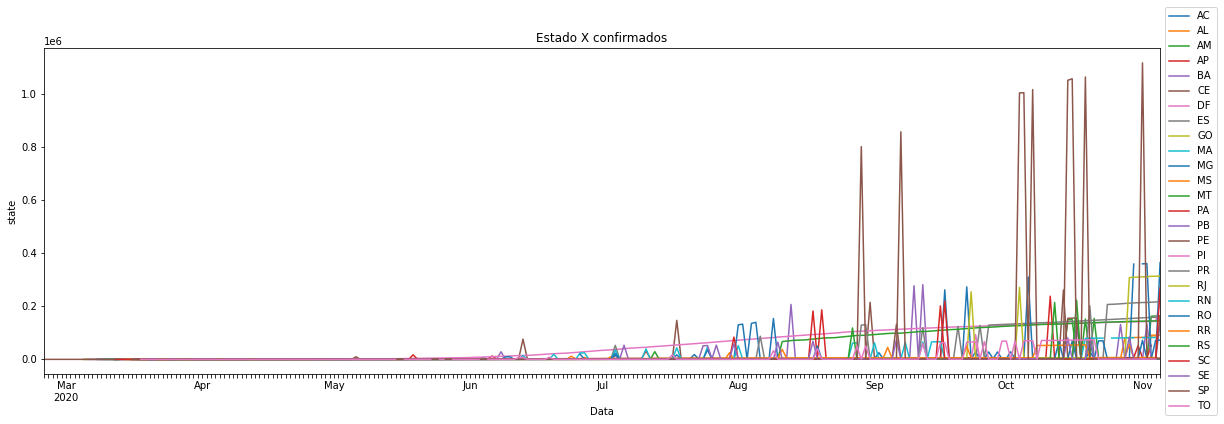

In [50]:
pivot_state_conf =  data.pivot_table(index='Data', columns='state', values='confirmed')
ax = pivot_state_conf.plot(xticks=pivot_state_conf.index,figsize =(20, 6))
ylab = ax.set_ylabel('state')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Estado X confirmados")
plt.show()

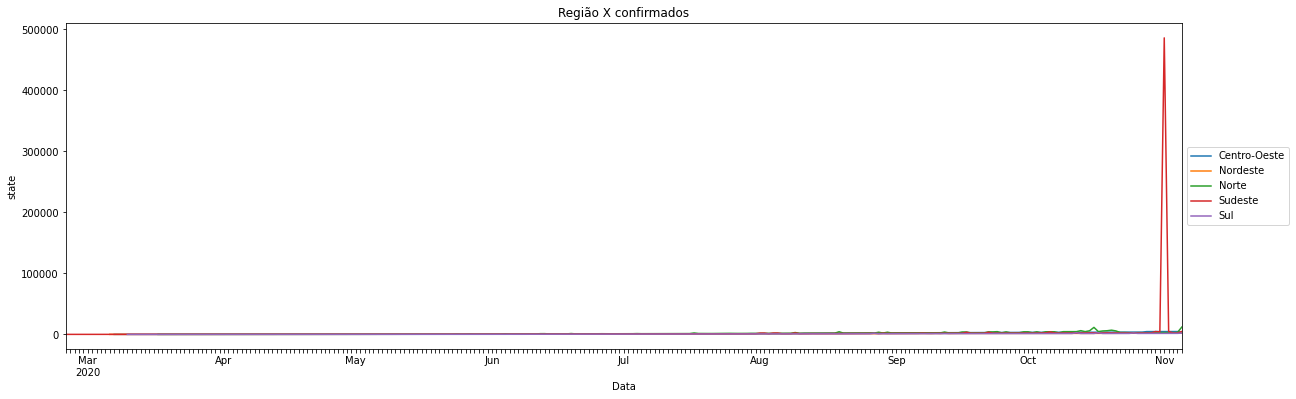

In [51]:
pivot_regiao_conf =  data.pivot_table(index='Data', columns='Regiao', values='confirmed')
ax = pivot_regiao_conf.plot(xticks=pivot_regiao_conf.index,figsize =(20, 6))
ylab = ax.set_ylabel('state')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Região X confirmados")
plt.show()

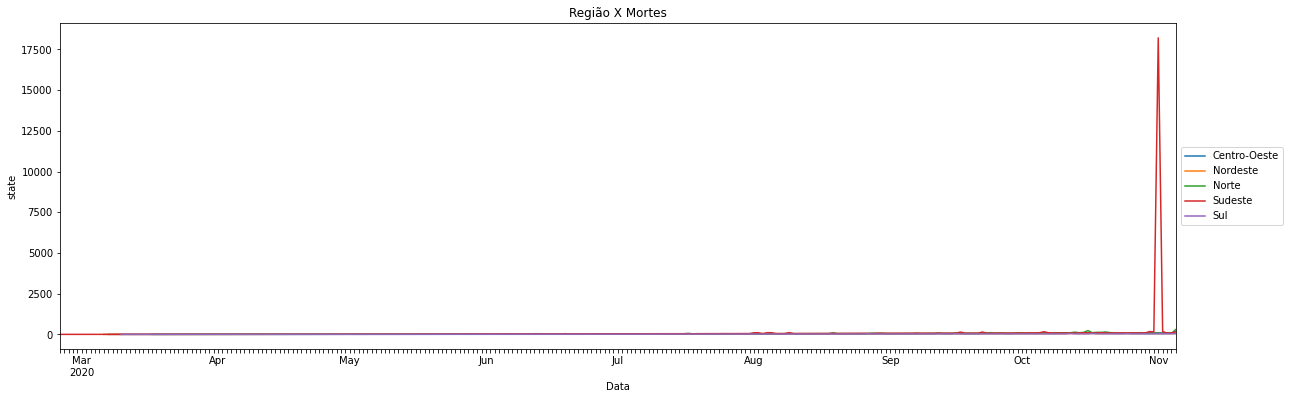

In [52]:
pivot_regiao_death =  data.pivot_table(index='Data', columns='Regiao', values='deaths')
ax = pivot_regiao_death.plot(xticks=pivot_regiao_death.index,figsize =(20, 6))
ylab = ax.set_ylabel('state')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Região X Mortes")
plt.show()

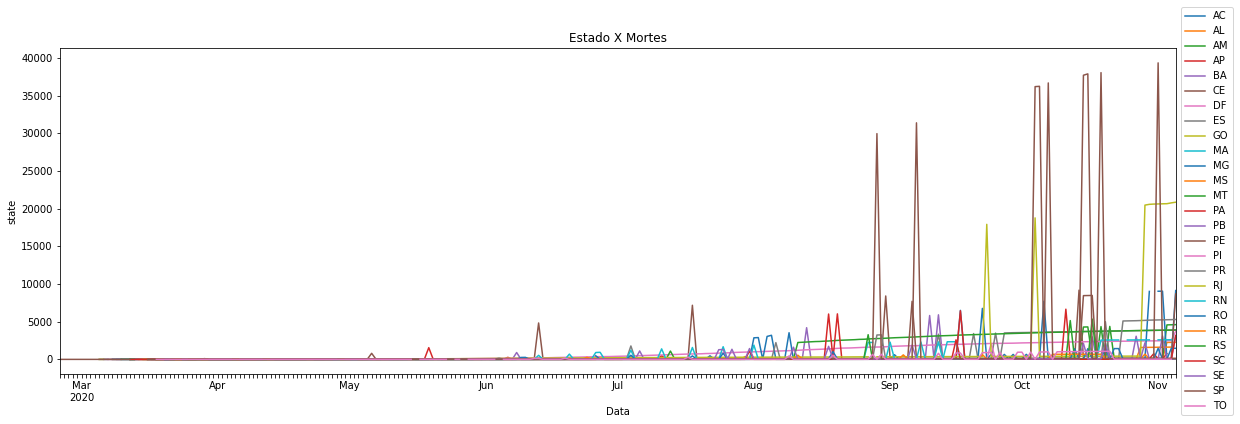

In [53]:
pivot_state_death =  data.pivot_table(index='Data', columns='state', values='deaths')
ax = pivot_state_death.plot(xticks=pivot_state_death.index,figsize =(20, 6))
ylab = ax.set_ylabel('state')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Estado X Mortes")
plt.show()

  ### - Avaliar os valores NAN
  ### - Avaliar Outliers

## separar as informações em:


### -Por a estados
#### -anomes
#### -diário
### -Por Região
#### -anomes
#### -Diário
### -Total
#### -Anomes
#### -Diário

## Gráfico da evolução de casos por cidade

## Gráfico do total de casos


## Desenvolvimento de projeções

## Criação de Hipótese

## Análises pontuais por tipo de evento

## Desenvolvimento de uma conclusão, respondendo a uma pergunta